In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#Constants

G = 6.67*10**-11 #Gravitational Constant
g = 9.81 #Gravity
Me = 5.9*10**24 #Mass of Earth
Mm = 7.3*10**22 #Mass of Moon
Ma = 5500 #Mass of Apollo Command Module
Re = 6378 #Radius of Earth
Rm = 1737 #Radius of Moon
Dem = 3.8 * 10**8 #Distance from Earth to Moon
VS1 = 2.4 * 10**3 #Exhaust velocity  Saturn 1
BS1 = 1.3* 10**4 #Burn rate Saturn 1
WS1 = 2.8 * 10**6 #Wet mass Saturn 1
DS1 = 7.5 * 10**5 #Dry mass Saturn 1

In [8]:
#1.1

#Potential at a distance r from a mass M
def PotentialEPoint (M, XM, YM, X, Y):
    r = np.sqrt(((XM-X)**2)+((YM-Y)**2))
    ans = (-G*M)/r
    return ans


C:\Users\MARTI\AppData\Local\Temp\ipykernel_22444\3039711919.py:6: RuntimeWarning: divide by zero encountered in divide
  ans = (-G*M)/r


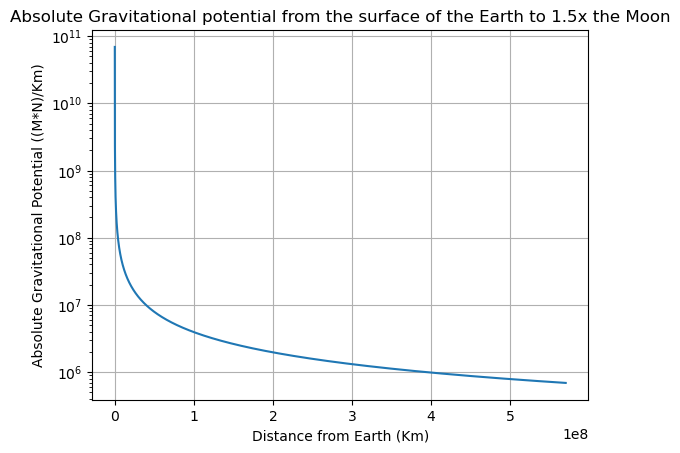

In [9]:
#1.2

#Make plot
fix, ax = plt.subplots()

#Get values
x = np.linspace(0, int(1.5*Dem), 10**5)
y = np.abs(PotentialEPoint(Me, 0, 0, x, 0))

#Plot plot
ax.plot(x,y);
ax.set_yscale("log");
ax.set_ylabel("Absolute Gravitational Potential ((M*N)/Km)");
ax.set_xlabel("Distance from Earth (Km)");
ax.set_title("Absolute Gravitational potential from the surface of the Earth to 1.5x the Moon");
ax.grid();

#Whatever I mess with in order to get rid of the div by zero will affect problems 2.1, 2.2, 2.3, so 
#since it does no affect it, I will keep the error

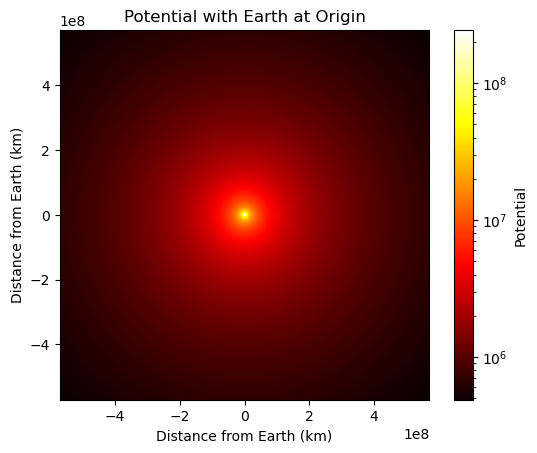

In [10]:
#1.3
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import cm, ticker

#Values 
x = np.linspace(-1.5*Dem, 1.5*Dem, 500)
y = x.copy()

#Meshed
x_grid, y_grid = np.meshgrid(x,y)

#Phi value
Phi = np.abs(PotentialEPoint(Me, 0, 0, x_grid, y_grid))

#make plot
fig, ax = plt.subplots(1,1)
mesh = ax.pcolormesh(x_grid, y_grid, Phi, cmap = cm.hot, norm = colors.LogNorm())

#Set aspect
ax.set_aspect("equal")
ax.set_ylabel("Distance from Earth (km)");
ax.set_xlabel("Distance from Earth (km)");
ax.set_title("Potential with Earth at Origin");

#Color Bar
cbar = fig.colorbar(mesh, label="Potential")



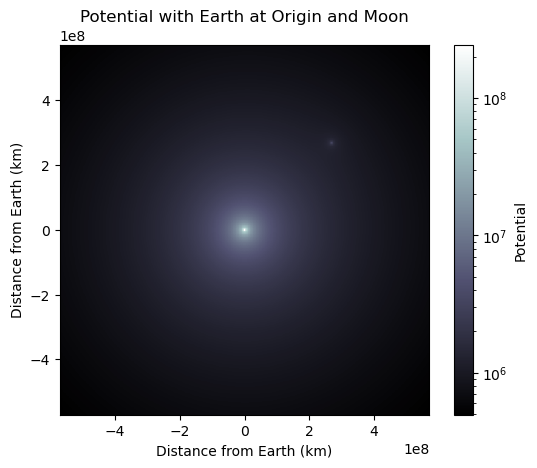

In [11]:
#2.1

#Coords
Xm = Dem/np.sqrt(2)
Ym = Xm.copy()

#Values 
x = np.linspace(-1.5*Dem, 1.5*Dem, 500)
y = x.copy()

#Meshed
x_grid, y_grid = np.meshgrid(x,y)

#Phis
Phi_Earth = np.abs(PotentialEPoint(Me, 0, 0, x_grid, y_grid))
Phi_Moon = np.abs(PotentialEPoint(Mm, 0, 0, x_grid-Xm, y_grid-Ym))
Phi_total = np.abs(-Phi_Earth-Phi_Moon)

#plots
fig, ax = plt.subplots(1,1)
mesh = ax.pcolormesh(x_grid, y_grid, Phi_total, cmap = cm.bone, norm = colors.LogNorm())

#Set aspect
ax.set_aspect("equal")
ax.set_ylabel("Distance from Earth (km)");
ax.set_xlabel("Distance from Earth (km)");
ax.set_title("Potential with Earth at Origin and Moon");

#Color Bar
cbar = fig.colorbar(mesh, label="Potential")



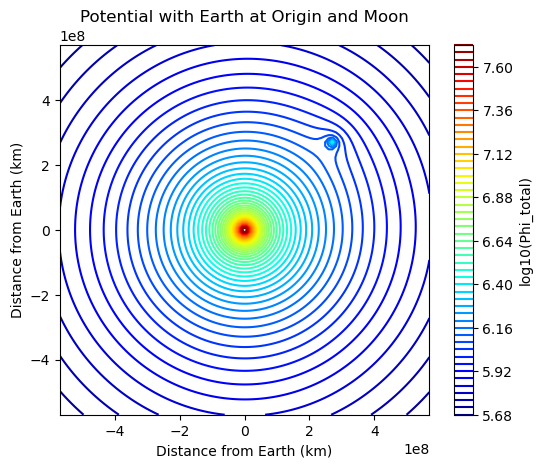

In [15]:
#2.2
from matplotlib import ticker
from matplotlib.colors import LogNorm

#Coords
Xm = Dem/np.sqrt(2)
Ym = Xm.copy()

#Values 
x = np.linspace(-1.5*Dem, 1.5*Dem, 100)
y = x.copy()

#Meshed
x_grid, y_grid = np.meshgrid(x,y)

#Phis
Phi_Earth = np.abs(PotentialEPoint(Me, 0, 0, x_grid, y_grid))
Phi_Moon = np.abs(PotentialEPoint(Mm, 0, 0, x_grid-Xm, y_grid-Ym))
Phi_total = np.abs(-Phi_Earth-Phi_Moon)

#plot
fig_contour, ax_contour = plt.subplots(1,1)
cntr = ax_contour.contour(x_grid, y_grid, np.log10(Phi_total), 50, cmap=cm.jet)
ax_contour.set_aspect("equal")
cbar = fig_contour.colorbar(cntr, label="log10(Phi_total)")

#labels
ax_contour.set_ylabel("Distance from Earth (km)");
ax_contour.set_xlabel("Distance from Earth (km)");
ax_contour.set_title("Potential with Earth at Origin and Moon");

In [13]:
#3.1

def grav_force(M1, xM, yM, x, y, M2):
    r_x = x - xM
    r_y = y - yM
    r = np.sqrt(r_x**2 + r_y**2) #distance total
    r = max(r, 1e3)  # Avoid division by zero
    F = G * M1 * M2 / r**2  # Magnitude
    return F * (r_x / r), F * (r_y / r)  # Return force components (Fx, Fy)

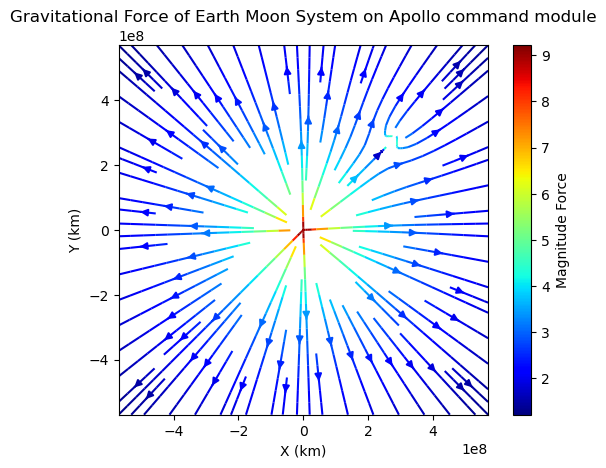

In [40]:
#3.2

#moon cords
xm, ym = Dem / np.sqrt(2), Dem / np.sqrt(2)  

# res of values
N = 50  
x = np.linspace(-1.5 * Dem, 1.5 * Dem, N)
y = np.linspace(-1.5 * Dem, 1.5 * Dem, N)
x_grid, y_grid = np.meshgrid(x, y) #meshed

# Force components
Fx, Fy = np.zeros_like(x_grid), np.zeros_like(y_grid)
for i in range(x_grid.shape[0]):
    for j in range(x_grid.shape[1]):
        # Force Earth
        Fe_x, Fe_y = grav_force(Me, 0, 0, x_grid[i, j], y_grid[i, j], Ma)
        # Force Moon
        Fm_x, Fm_y = grav_force(Mm, xm, ym, x_grid[i, j], y_grid[i, j], Ma)
        # Force total
        Fx[i, j] = Fe_x + Fm_x
        Fy[i, j] = Fe_y + Fm_y

# plot
fig, ax = plt.subplots()
colors = np.log(np.sqrt(Fx**2 + Fy**2))
strm = ax.streamplot(x_grid, y_grid, Fx, Fy, color=colors, cmap='jet')
ax.set_aspect("equal")
cbar = fig.colorbar(strm.lines, label="Magnitude Force")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_title("Gravitational Force of Earth Moon System on Apollo command module")

In [19]:
#4.1

T = (WS1 - DS1) / BS1  # Burn time
print(T, "seconds")

157.69230769230768 seconds


In [20]:
#4.2

def delta_v(T, Wm, Dm, Br, Ve, G):
    #Mass as function of time
    m_t = max(Wm - Br * T, Dm)  # Ensure mass doesn't drop below mf
    return (Ve * np.log(Wm / m_t)) - G * T

In [23]:
#4.3
from scipy.integrate import quad

# Integrate velocity over time
sum, err = quad(lambda t: delta_v(t, WS1, DS1, BS1, VS1, g), 0, T)

print(sum, "meters or", sum/1000, "km")

74093.98013366401 meters or 74.093980133664 km
